In [24]:
import nltk
import pandas as pd
import re

In [25]:
text = pd.read_csv('Data/dataset.csv')

In [26]:
text.head()

,movie_name,script
0,12 Monkeys,Twelve MonkeysTWELVE MONKEYS An o...
1,2001 A Space Odyssey,2001: A SPACE ODYSSEY Screenplay ...
2,2012,...
3,28 Days Later,28 DAYS LATER ...
4,9,...


In [27]:
text.dropna(inplace=True)

In [28]:
text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movie_name  165 non-null    object
 1   script      165 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


# pre-processing

In [29]:
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer

In [30]:
stop_words = stopwords.words('english')
stop_words.extend(['int','ext','im','one','contd','hand','door','room','cut'])

In [31]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/anna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
def tokenize_list(texts):
    word_list = []
    for item in range(len(texts)):
        
        word_list.append(nltk.word_tokenize(texts[item]))
    return word_list

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    for item in range(len(text)):
        text[item]=  [lemmatizer.lemmatize(w,pos='v') for w in text[item]]
        
    return text

In [34]:
text_list = tokenize_list(text.script.tolist())
text_list = remove_stopwords(text_list)
text_list = lemmatize(text_list)

In [35]:
len(text_list)

165

In [36]:
import gensim.corpora as corpora

# Create dictionary
id2word = corpora.Dictionary(text_list)


# Create corpus: Word frequency 
corpus = [id2word.doc2bow(text) for text in text_list]

# View
print(corpus[:1][0][:30])

[(0, 3), (1, 1), (2, 1), (3, 4), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 4), (14, 2), (15, 2), (16, 1), (17, 1), (18, 1), (19, 2), (20, 3), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 15)]


In [37]:
from tqdm import tqdm
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [38]:
# def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=5):
#     coherence_values = []
#     model_list = []
#     for num_topics in tqdm(range(start, limit, step)):
#         model = LdaMulticore(corpus, id2word=id2word, num_topics=10)
#         model_list.append(model)
#         coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
#         coherence_values.append(coherencemodel.get_coherence())
#     return model_list, coherence_values
# # Colocando parametros na função
# model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=text_list, start=2, limit=30, step=2)
# # Mostrando visualmente a quantidade de tópicos
# limit=30; start=2; step=2;
# x = range(start, limit, step)
# plt.plot(x, coherence_values)
# plt.xlabel("Num Tópicos")
# plt.ylabel("Score de Coerência")
# plt.legend(("Valores de Coerência"), loc='best')
# plt.show()
# # Lista dos valores de coerência, para melhor identificar o ponto de inflexão do gráfico
# for m, cv in zip(x, coherence_values):
#     print("A quantidade de tópicos =", m, " tem um valor de coerência de ", round(cv, 4))

In [39]:
#https://medium.com/somos-tera/como-modelar-t%C3%B3picos-atrav%C3%A9s-de-latent-dirichlet-allocation-lda-atrav%C3%A9s-da-biblioteca-gensim-1fa17357ad4b

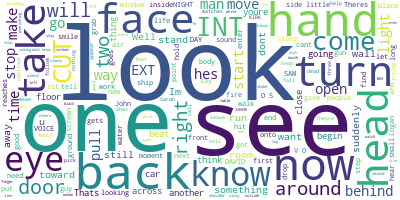

In [40]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(text['script'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [41]:
from pprint import pprint
# number of topics
num_topics = 4

# Build LDA model
lda_model = LdaMulticore(corpus=corpus,
                        id2word=id2word,
                        num_topics=num_topics, 
                        random_state=42,
                        chunksize=100,
                        passes=10,
                        per_word_topics=True,
                        alpha = 1,
                        eta = 0.2)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/home/anna/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/anna/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/anna/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/anna/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/anna/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the i

KeyboardInterrupt: 

In [ ]:
#https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=text_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('Data/prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'Data/prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
#topic_scores = [[topic_score[1] for topic_score in sent] for sent in doc_lda]

In [ ]:
#df_topics = pd.DataFrame(topic_scores)